In [100]:

# Importing Libraries\n
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN
import os
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

# Exploratory data analytics

In [101]:
# Setting working directory,
os.chdir("C:/Users/Ankit singh/Desktop/R Project")
# Loading data\n,
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [102]:
#Checking the type of each variable
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [103]:
for i in df.columns:
    df = df.rename(index=str, columns={i: i.replace(" ", "_")})

In [104]:
#Removing last three rows where month is 0( as it can only be between 1-12) Disciplinary failure and service time also has abnormal trend for these three rows
df=df.iloc[0:737]

In [105]:
#Categorizing the column into two catgories: continuous variable and categorical variable
#Categorical variabes
cont=['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age',
        'Work_load_Average/day_', 'Hit_target','Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']

cat= ['ID','Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
             'Disciplinary_failure', 'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet']

# Missing value analysis

In [106]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Saving output result into csv file
missing_val.to_csv("Missing_perc.csv", index = False)

In [107]:
missing_val

,Variables,Missing_percentage
0,Body_mass_index,4.206242
1,Absenteeism_time_in_hours,2.985075
2,Height,1.899593
3,Work_load_Average/day_,1.356852
4,Education,1.356852
5,Transportation_expense,0.949796
6,Son,0.814111
7,Disciplinary_failure,0.814111
8,Hit_target,0.814111
9,Social_smoker,0.542741


In [108]:
# Imputing employee specific msiing details
df["Transportation_expense"]=df.groupby(["ID"])["Transportation_expense"].transform(lambda x:x.fillna(x.mean()))
df["Distance_from_Residence_to_Work"]=df.groupby(['ID'])["Distance_from_Residence_to_Work"].transform(lambda x:x.fillna(x.mean()))
df["Service_time"]=df.groupby(['ID'])["Service_time"].transform(lambda x:x.fillna(x.mean()))
df["Age"]=df.groupby(['ID'])["Age"].transform(lambda x:x.fillna(x.mean()))
df["Education"]=df.groupby(['ID'])["Education"].transform(lambda x:x.fillna(x.mean()))
df["Son"]=df.groupby(['ID'])["Son"].transform(lambda x:x.fillna(x.mean()))
df["Social_smoker"]=df.groupby(['ID'])["Social_smoker"].transform(lambda x:x.fillna(x.mean()))
df["Social_drinker"]=df.groupby(['ID'])["Social_drinker"].transform(lambda x:x.fillna(x.mean()))
df["Pet"]=df.groupby(['ID'])["Pet"].transform(lambda x:x.fillna(x.mean()))
df["Weight"]=df.groupby(['ID'])["Weight"].transform(lambda x:x.fillna(x.mean()))
df["Height"]=df.groupby(['ID'])["Height"].transform(lambda x:x.fillna(x.mean()))
df["Body_mass_index"]=df.groupby(['ID'])["Body_mass_index"].transform(lambda x:x.fillna(x.mean()))
df['Month_of_absence'].fillna(10,inplace=True)
df["Work_load_Average/day_"]=df.groupby(['Month_of_absence'])["Work_load_Average/day_"].transform(lambda x:x.fillna(x.mean()))




In [109]:
df.isnull().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    0
Day_of_the_week                     0
Seasons                             0
Transportation_expense              0
Distance_from_Residence_to_Work     0
Service_time                        0
Age                                 0
Work_load_Average/day_              0
Hit_target                          6
Disciplinary_failure                6
Education                           0
Son                                 0
Social_drinker                      0
Social_smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body_mass_index                     0
Absenteeism_time_in_hours          22
dtype: int64

In [110]:
#Imputing categorical variable with mode
for i in cat:
    print(i)
    df[i] = df[i].fillna(df[i].mode()[0])

ID
Reason_for_absence
Month_of_absence
Day_of_the_week
Seasons
Disciplinary_failure
Education
Son
Social_drinker
Social_smoker
Pet


In [111]:
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
df.isnull().sum() #0 missing value found

Imputing row 1/737 with 0 missing, elapsed time: 1.913
Imputing row 101/737 with 0 missing, elapsed time: 1.925
Imputing row 201/737 with 0 missing, elapsed time: 1.929
Imputing row 301/737 with 0 missing, elapsed time: 1.937
Imputing row 401/737 with 0 missing, elapsed time: 1.944
Imputing row 501/737 with 0 missing, elapsed time: 1.951
Imputing row 601/737 with 0 missing, elapsed time: 1.958
Imputing row 701/737 with 0 missing, elapsed time: 1.963


ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

# Outlier Analysis

In [112]:
# As target can't be function of ID, so dropping the varaible
df = df.drop(['ID'], axis=1)


Transportation_expense


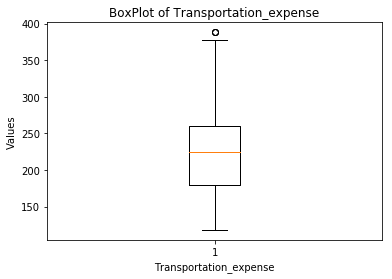

Distance_from_Residence_to_Work


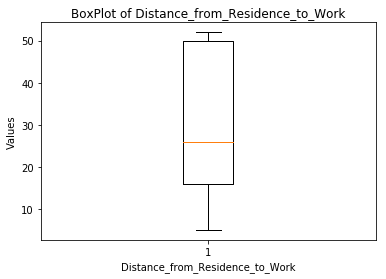

Service_time


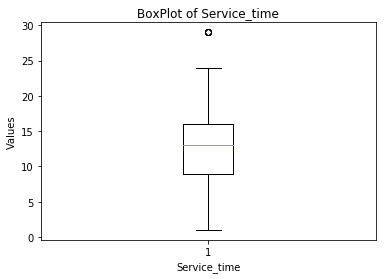

Age


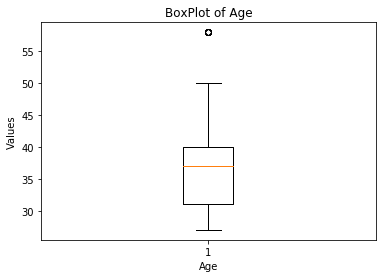

Work_load_Average/day_


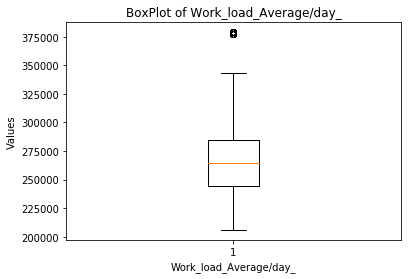

Hit_target


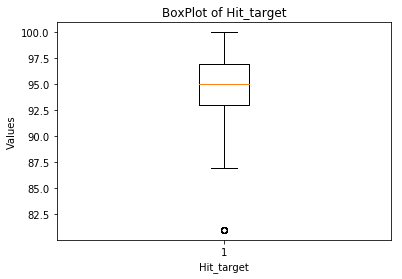

Weight


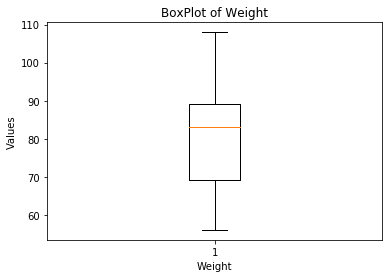

Height


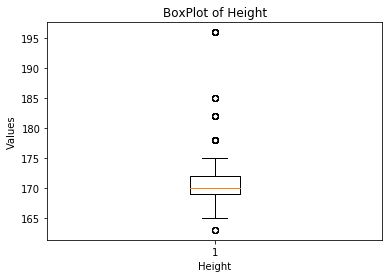

Body_mass_index


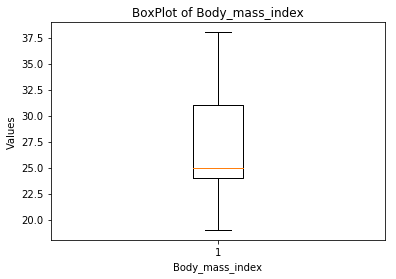

Absenteeism_time_in_hours


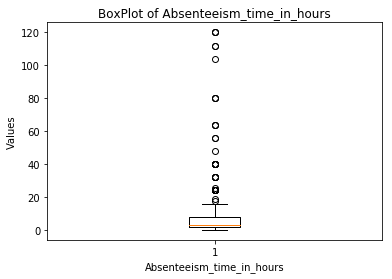

In [113]:
# Outlier ANalysis

for i in cont:
    print(i)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+str(i))
    plt.show()

In [114]:
df1=df.copy

In [115]:
# Treating the outlier( below 25 percentile or above 75)

for i in cont:
    print(i)
    q75,q25= np.percentile(df.loc[:,i],[75,25])
    iqr= q75-q25
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)   
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan

Transportation_expense
Distance_from_Residence_to_Work
Service_time
Age
Work_load_Average/day_
Hit_target
Weight
Height
Body_mass_index
Absenteeism_time_in_hours


In [116]:
# Imputing missing value
#Check NA in dataset-
df.isnull().sum()

#Impute NA with KNN-

df= pd.DataFrame(KNN(k=3).fit_transform(df),columns=df.columns)

Imputing row 1/737 with 0 missing, elapsed time: 1.916
Imputing row 101/737 with 1 missing, elapsed time: 1.927
Imputing row 201/737 with 0 missing, elapsed time: 1.938
Imputing row 301/737 with 0 missing, elapsed time: 1.960
Imputing row 401/737 with 0 missing, elapsed time: 1.970
Imputing row 501/737 with 0 missing, elapsed time: 1.981
Imputing row 601/737 with 0 missing, elapsed time: 1.991
Imputing row 701/737 with 0 missing, elapsed time: 2.002


In [117]:
# Converting all numbers to integer
for i in df.columns:
    df.loc[:,i]=df.loc[:,i].round()

# Feature Selection

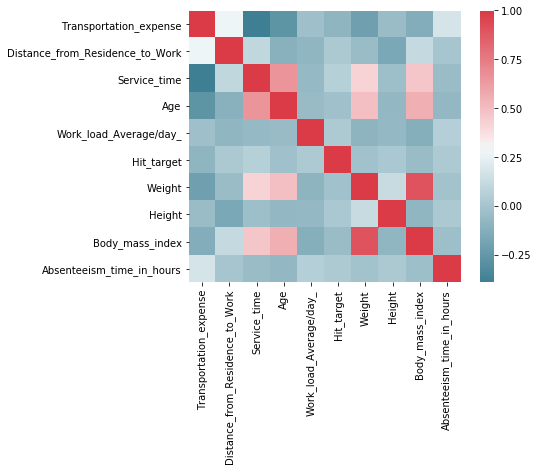

In [118]:
#Feature Selection


##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cont]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()
corr
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [119]:
#. As Body MAssweight.  index is highly correlated with weight. As weight is basic varaible, so excluding body mass index. 

df = df.drop(['Body_mass_index'], axis=1)


In [120]:
#UPdating variables
cont=['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age',
        'Work_load_Average/day_', 'Hit_target','Weight', 'Height',
       'Absenteeism_time_in_hours']

cat= ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
             'Disciplinary_failure', 'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet']

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = 'Absenteeism_time_in_hours'
for  i in cat:
    c = y + ' ~ ' + i
    model = ols(c,data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)

                         sum_sq     df          F    PR(>F)
Reason_for_absence   204.090364    1.0  18.337173  0.000021
Residual            8180.455090  735.0        NaN       NaN
                       sum_sq     df         F    PR(>F)
Month_of_absence     0.300091    1.0  0.026307  0.871197
Residual          8384.245364  735.0       NaN       NaN
                      sum_sq     df        F    PR(>F)
Day_of_the_week    44.280447    1.0  3.90229  0.048594
Residual         8340.265007  735.0      NaN       NaN
               sum_sq     df         F    PR(>F)
Seasons     26.228179    1.0  2.306411  0.129271
Residual  8358.317276  735.0       NaN       NaN
                           sum_sq     df          F        PR(>F)
Disciplinary_failure   594.480066    1.0  56.089754  1.988584e-13
Residual              7790.065388  735.0        NaN           NaN
                sum_sq     df        F    PR(>F)
Education     4.418212    1.0  0.38751  0.533804
Residual   8380.127243  735.0      NaN   

In [122]:
df = df.drop(["Pet","Social_smoker","Education","Seasons","Month_of_absence"],axis=1)

In [123]:
data= df.copy()

In [124]:
#updating continuous variables-
cont= ['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age',
        'Work_load_Average/day_', 'Hit_target','Height', 'Weight',
       'Absenteeism_time_in_hours']

#updating categorical variables-
cat= ['Reason_for_absence','Day_of_the_week','Disciplinary_failure','Son', 'Social_drinker']



# Feature scaling

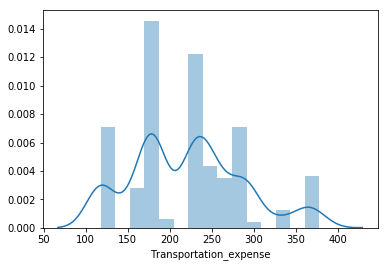

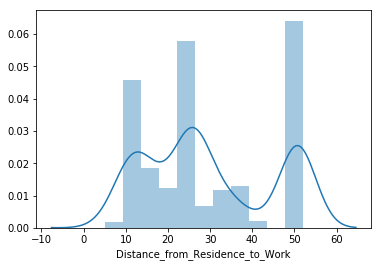

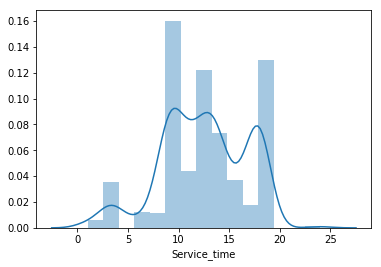

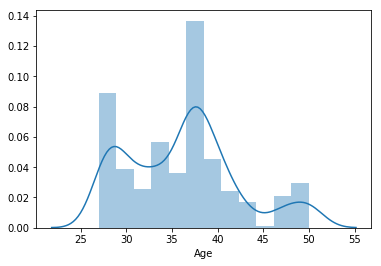

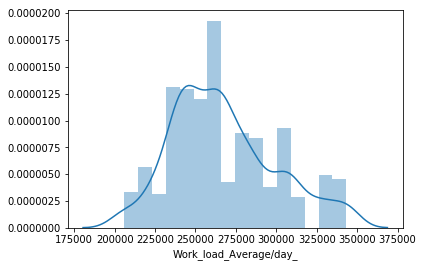

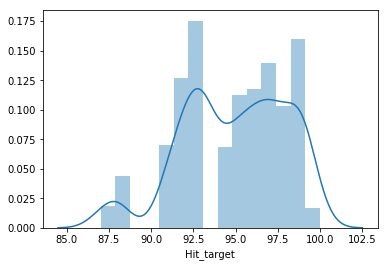

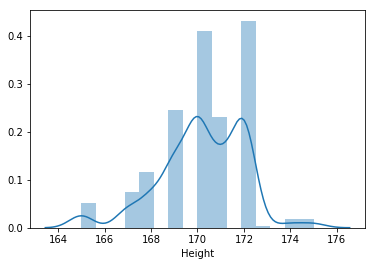

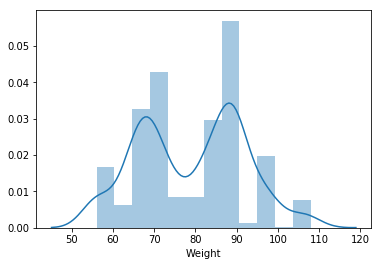

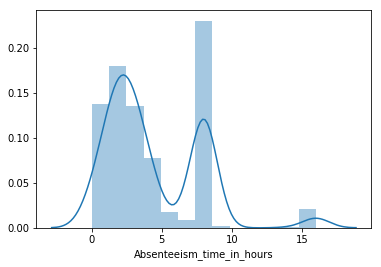

In [125]:

#Normality check
%matplotlib inline  
for i in cont:
    sns.distplot(df[i], bins='auto')
    plt.show()

In [126]:
# As the distribution is not normal, we will normalize them instead of standardization
for i in cont:
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [127]:
data_pre=df.copy()

In [128]:
# Creating dummy variables for categical features
df = pd.get_dummies(data = df, columns = cat)

In [129]:
print(df.columns)

Index(['Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Weight',
       'Height', 'Absenteeism_time_in_hours', 'Reason_for_absence_0.0',
       'Reason_for_absence_1.0', 'Reason_for_absence_2.0',
       'Reason_for_absence_3.0', 'Reason_for_absence_4.0',
       'Reason_for_absence_5.0', 'Reason_for_absence_6.0',
       'Reason_for_absence_7.0', 'Reason_for_absence_8.0',
       'Reason_for_absence_9.0', 'Reason_for_absence_10.0',
       'Reason_for_absence_11.0', 'Reason_for_absence_12.0',
       'Reason_for_absence_13.0', 'Reason_for_absence_14.0',
       'Reason_for_absence_15.0', 'Reason_for_absence_16.0',
       'Reason_for_absence_17.0', 'Reason_for_absence_18.0',
       'Reason_for_absence_19.0', 'Reason_for_absence_21.0',
       'Reason_for_absence_22.0', 'Reason_for_absence_23.0',
       'Reason_for_absence_24.0', 'Reason_for_absence_25.0',
       'Reason_for_absence_26.0', 'Reason_for_absence_27.

# Modelling

In [130]:
#Seperating out target and predictor
X= df.drop(['Absenteeism_time_in_hours'],axis=1)
y= df['Absenteeism_time_in_hours']
X.shape

(737, 50)

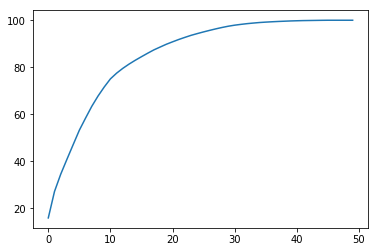

In [131]:
# Dimensionlaiy reduction using PCA
from sklearn.decomposition import PCA

# Converting data to numpy array as PCA only understands numpy
X = df.values

# Data has 50 variables so no of components can go upto 50. We are taking 50 component to inititalize the PCA
pca = PCA(n_components=50)
pca.fit(X)

# variance that each PC explains
variance= pca.explained_variance_ratio_

# Cumulative Variance explained 
cum_var=np.cumsum(np.round(variance, decimals=4)*100)

plt.plot(cum_var)
plt.show()

#We can see that 40 componenets explan almost 99% of variance

In [132]:
#We can see that 40 componenets explan almost 99% of variance
pca = PCA(n_components=40)

# Applying PCA to our dataset
pca.fit(X)

# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [133]:
# Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Model development
DT_model = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Predicting our variable for train and test
DT_train = DT_model.predict(X_train)
DT_test = DT_model.predict(X_test)


# Calculatng important metrix
RMSE_train = np.sqrt(mean_squared_error(y_train,DT_train))
RMSE_test =np.sqrt(mean_squared_error(y_test,DT_test))
R_square=r2_score(y_test,DT_test)

#SHowing the output
print("RMSE_Train = "+str(RMSE_train))
print("RMSE_test = "+str(RMSE_test))
print("R^2 Score = "+str(R_square))

RMSE_Train = 0.03601673124164769
RMSE_test = 0.03691292698813352
R^2 Score = 0.9688666152783747


In [134]:
# Libraries
from sklearn.ensemble import RandomForestRegressor

# Model development
RF_model = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Predicting our variable for train and test
RF_train = RF_model.predict(X_train)
RF_test = RF_model.predict(X_test)


# Calculatng important metrix
RMSE_train = np.sqrt(mean_squared_error(y_train,RF_train))
RMSE_test =np.sqrt(mean_squared_error(y_test,RF_test))
R_square=r2_score(y_test,RF_test)

#SHowing the output
print("RMSE_Train = "+str(RMSE_train))
print("RMSE_test = "+str(RMSE_test))
print("R^2 Score = "+str(R_square))

RMSE_Train = 0.0022333079666011597
RMSE_test = 0.005433926287561199
R^2 Score = 0.9993253215218552


In [135]:
# Libraries
from sklearn.linear_model import LinearRegression

# Model development
LR_model = LinearRegression().fit(X_train , y_train)

# Predicting our variable for train and test
LR_train = LR_model.predict(X_train)
LR_test = LR_model.predict(X_test)


# Calculatng important metrix
RMSE_train = np.sqrt(mean_squared_error(y_train,LR_train))
RMSE_test =np.sqrt(mean_squared_error(y_test,LR_test))
R_square=r2_score(y_test,LR_test)

#SHowing the output
print("RMSE_Train = "+str(RMSE_train))
print("RMSE_test = "+str(RMSE_test))
print("R^2 Score = "+str(R_square))

RMSE_Train = 4.3183292431772774e-16
RMSE_test = 4.4072153428347346e-16
R^2 Score = 1.0


In [136]:
# Libraries
from sklearn.ensemble import GradientBoostingRegressor

# Model_development
GB_model = GradientBoostingRegressor().fit(X_train, y_train)

# Predicting our variable for train and test
GB_train = GB_model.predict(X_train)
GB_test = GB_model.predict(X_test)


# Calculatng important metrix
RMSE_train = np.sqrt(mean_squared_error(y_train,GB_train))
RMSE_test =np.sqrt(mean_squared_error(y_test,GB_test))
R_square=r2_score(y_test,GB_test)

#SHowing the output
print("RMSE_Train = "+str(RMSE_train))
print("RMSE_test = "+str(RMSE_test))
print("R^2 Score = "+str(R_square))

RMSE_Train = 0.00030414299141282285
RMSE_test = 0.0003074057406475711
R^2 Score = 0.9999978407977806
